In [1]:
pip install networkx matplotlib numpy pandas


1. Data Loading and Preparation

    Load GEXF Files

In [13]:
import networkx as nx

# Load Day 1 and Day 2 graphs
graph_day1 = nx.read_gexf("first_graph.gexf")
graph_day2 = nx.read_gexf("second_graph.gexf")

# Check basic structure
def graph_info(graph, name):
    print(f"Graph Info: {name}")
    print(f" - Number of Nodes: {graph.number_of_nodes()}")
    print(f" - Number of Edges: {graph.number_of_edges()}")

graph_info(graph_day1, "Day 1")
graph_info(graph_day2, "Day 2")



Graph Info: Day 1
 - Number of Nodes: 236
 - Number of Edges: 5899
Graph Info: Day 2
 - Number of Nodes: 238
 - Number of Edges: 5539


Integrate Metadata


In [14]:
# Load metadata
metadata = {}
with open("metadata.txt", "r") as file:
    for line in file:
        node_id, classname, gender = line.strip().split("\t")
        metadata[node_id] = {"classname": classname, "gender": gender}

# Annotate graphs with metadata
for graph in [graph_day1, graph_day2]:
    for node in graph.nodes:
        if node in metadata:
            graph.nodes[node]['classname'] = metadata[node]['classname']
            graph.nodes[node]['gender'] = metadata[node]['gender']


2. Basic Properties Analysis


Degree Distribution

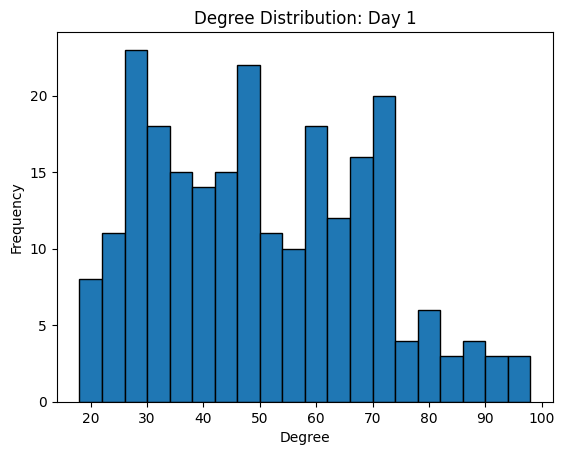

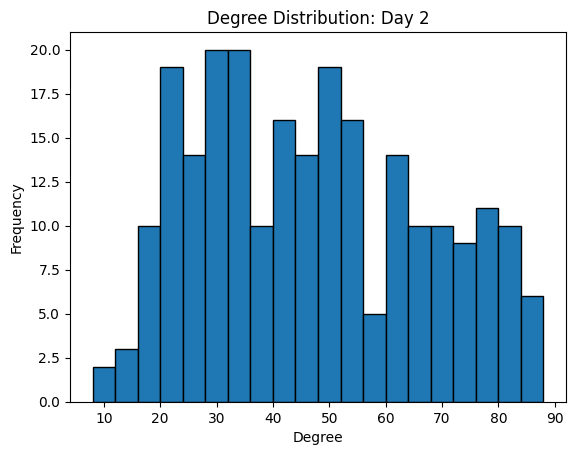

In [15]:
import matplotlib.pyplot as plt

def plot_degree_distribution(graph, title):
    degrees = [d for _, d in graph.degree()]
    plt.hist(degrees, bins=20, edgecolor="black")
    plt.title(f"Degree Distribution: {title}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

plot_degree_distribution(graph_day1, "Day 1")
plot_degree_distribution(graph_day2, "Day 2")


Centrality Metrics

In [16]:
def compute_centrality(graph, name):
    degree_centrality = nx.degree_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)

    print(f"Centrality Metrics for {name}:")
    print(f" - Average Degree Centrality: {sum(degree_centrality.values()) / len(degree_centrality)}")
    print(f" - Average Closeness Centrality: {sum(closeness_centrality.values()) / len(closeness_centrality)}")
    print(f" - Average Betweenness Centrality: {sum(betweenness_centrality.values()) / len(betweenness_centrality)}")

compute_centrality(graph_day1, "Day 1")
compute_centrality(graph_day2, "Day 2")


Centrality Metrics for Day 1:
 - Average Degree Centrality: 0.2127298954201225
 - Average Closeness Centrality: 0.5411177705254585
 - Average Betweenness Centrality: 0.0036770938321605442
Centrality Metrics for Day 2:
 - Average Degree Centrality: 0.19639754636031628
 - Average Closeness Centrality: 0.521376474561078
 - Average Betweenness Centrality: 0.0039853315280199185


Clustering Coefficient

In [17]:
print(f"Day 1 - Average Clustering Coefficient: {nx.average_clustering(graph_day1)}")
print(f"Day 2 - Average Clustering Coefficient: {nx.average_clustering(graph_day2)}")


Day 1 - Average Clustering Coefficient: 0.5018529176737271
Day 2 - Average Clustering Coefficient: 0.5595585328496339


3. Community Detection


In [18]:
import community.community_louvain as community_louvain

def detect_communities(graph, name):
    partition = community_louvain.best_partition(graph)
    num_communities = len(set(partition.values()))
    print(f"{name}: Number of Communities = {num_communities}")
    return partition

partition_day1 = detect_communities(graph_day1, "Day 1")
partition_day2 = detect_communities(graph_day2, "Day 2")


Day 1: Number of Communities = 4
Day 2: Number of Communities = 6


4. Epidemiological Modeling

In [19]:
import random

def si_model(graph, infection_prob, steps):
    infected = set(random.sample(list(graph.nodes), 1))  # Random starting node
    for _ in range(steps):
        new_infected = set()
        for node in infected:
            for neighbor in graph.neighbors(node):
                if neighbor not in infected:
                    weight = graph[node][neighbor].get('duration', 1)  # Use duration as weight
                    if random.random() < infection_prob * weight:
                        new_infected.add(neighbor)
        infected.update(new_infected)
    return len(infected)

# Simulate on both graphs
infection_prob = 0.001
steps = 10

print(f"Day 1 - Final Infected Count: {si_model(graph_day1, infection_prob, steps)}")
print(f"Day 2 - Final Infected Count: {si_model(graph_day2, infection_prob, steps)}")


Day 1 - Final Infected Count: 236
Day 2 - Final Infected Count: 238
